### HW 7 Assignment 1

In [295]:
import urllib
import pandas as pd
import geopandas
import os
%matplotlib inline
from matplotlib import *
import sys
import pylab as pl
import requests
import json
import numpy as np
import io
from fiona.crs import from_epsg 
import shapely
import geopandas as gpd
from datetime import datetime
from datetime import timedelta

In [ ]:
###Worked with Mei Guan @MeiGuan and Ross MacWhinney @RossMacW

#### WORKING WITHOUT A KEY AND HAVE EXCEEDED THE LIMIT, submitting for an extension so I can complete the homework and cleanup the notebook

In [28]:
#create the env variable since previous doesn't work
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [51]:
def PUMA():
    print ("Downloading")
    if not os.path.isfile(os.getenv("PUIDATA") + "/puma.zip"):
        print ("no zip in puidata")
        if not os.path.isfile("puma.zip"):
            print ("no zip in current folder")
            urllib.request.urlretrieve('https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile', "puma.zip")                  

    os.system("mv puma.zip " + os.getenv("PUIDATA"))
    print ("moving zipped file")
    
    ### unzip the csv 
    os.system("unzip "+ os.getenv("PUIDATA") + "/puma.zip -d " + os.getenv("PUIDATA"))
    print ("unzipped file")

#     #move individual files out of pluto for web, for easier access
#     for x in boroughs:
#         os.system("mv " + os.getenv("PUIDATA")+ "/PLUTO_for_WEB/" + x + "_18v1.csv " + os.getenv("PUIDATA"))
#         ### One final check:
#         if not os.path.isfile(os.getenv("PUIDATA") + "/" + x + "_18v1.csv"):
#             print ("WARNING!!! something is wrong: the %s file is not there!" % (x))

#         else:
#             print ("file in place, you can continue")

In [52]:
PUMA()

Downloading
no zip in puidata
no zip in current folder
moving zipped file
unzipped file


In [ ]:
#consider the fact that the string changes everytime....

In [58]:
# shapefiles = ['dbf', 'prj', 'shp', 'shx']

In [59]:
# shapedict = {}

In [60]:
# for x in shapefiles:
#     shapedict[x] = geopandas.GeoDataFrame.from_file(os.getenv("PUIDATA")\
#                                                     + '/geo_export_79f4e48b-26c3-4d2b-821a-dde8ae134ac6.' + x)

FionaValueError: No dataset found at path '/nfshome/sjf374/PUI2018/PUIdata/geo_export_79f4e48b-26c3-4d2b-821a-dde8ae134ac6.prj' using drivers: *

In [63]:
shape = geopandas.GeoDataFrame.from_file(os.getenv("PUIDATA")\
                        + '/geo_export_79f4e48b-26c3-4d2b-821a-dde8ae134ac6.shp')

In [64]:
shape.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [66]:
shape.crs

{'init': 'epsg:4326'}

In [ ]:
# using the built in plot function as pumashp.plot(pumashp....)
# using a choroplethNYC function that FBB wrote
# cp.choroplethNYC(pumashp, column=None, color="white", edgecolor="black", lw=2);

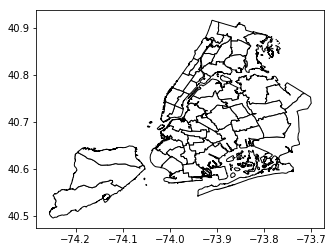

In [74]:
shape.plot(color="white", edgecolor="black")

In [ ]:
## ADD CAPTION

In [75]:
os.system("unzip "+ os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.US05PR.zip -d " + os.getenv("PUIDATA"))

0

In [81]:
#read in in the variables available. the info you need is in the 1year ACS data
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [84]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))

In [86]:
aff1y

{'variables': {'B23009_020E': {'attributes': 'B23009_020M,B23009_020EA',
   'concept': 'PRESENCE OF OWN CHILDREN UNDER 18 YEARS BY FAMILY TYPE BY NUMBER OF WORKERS IN FAMILY IN THE PAST 12 MONTHS',
   'group': 'B23009',
   'label': 'Estimate!!Total!!With own children of the householder under 18 years!!Other family!!Female householder, no husband present!!1 worker',
   'limit': 0,
   'predicateType': 'int'},
  'B23002D_079E': {'attributes': 'B23002D_079M,B23002D_079EA',
   'concept': 'SEX BY AGE BY EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER (ASIAN ALONE)',
   'group': 'B23002D',
   'label': 'Estimate!!Total!!Female!!70 years and over!!Not in labor force',
   'limit': 0,
   'predicateType': 'int'},
  'B14002_048E': {'attributes': 'B14002_048M,B14002_048EA',
   'concept': 'SEX BY SCHOOL ENROLLMENT BY LEVEL OF SCHOOL BY TYPE OF SCHOOL FOR THE POPULATION 3 YEARS AND OVER',
   'group': 'B14002',
   'label': 'Estimate!!Total!!Female!!Enrolled in school!!Enrolled in graduate or pro

In [87]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL')]

In [94]:
#keyword for the number of households
##WHY DIDNT this one GET PULLED 
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [95]:
#keyword for the number of households with broarband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [99]:
# getting the broadband access number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [100]:
#getting the first row of the table: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36"
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))


pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [108]:
pumaPP['public use microdata area'].nunique()

145

In [111]:
mergeddf = pd.merge(pumaPP, pumaBB, how='outer', on='public use microdata area')

In [112]:
mergeddf.head()

,B28002_001E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_004E,NAME_y,state_y,Unnamed: 4_y
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN,32607,"St. Lawrence County PUMA, New York",36,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN,41210,"Warren & Washington Counties PUMA, New York",36,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,47786,Oneida County (Central)--Greater Utica & Rome ...,36,NaN


In [116]:
mergeddf['pcBB'] = (mergeddf['B28002_004E'] / mergeddf['B28002_001E'])*100

In [117]:
mergeddf.head()

,B28002_001E,NAME_x,state_x,public use microdata area,Unnamed: 4_x,B28002_004E,NAME_y,state_y,Unnamed: 4_y,pcBB
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN,32607,"St. Lawrence County PUMA, New York",36,NaN,80.552879
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,NaN,75.733321
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN,41210,"Warren & Washington Counties PUMA, New York",36,NaN,79.842678
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,NaN,81.433409
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,47786,Oneida County (Central)--Greater Utica & Rome ...,36,NaN,78.150656


In [119]:
os.system("unzip "+ os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50.zip -d " + os.getenv("PUIDATA"))


256

In [120]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"])

bbpc.head()

,GCT_STUB.target-geo-id2,HC01,HC02
0,Target Geo Id2,Percent,Margin of Error
1,01,74.7,0.5
2,0100100,70.9,2.5
3,0100200,80.5,2.7
4,0100301,87.0,2.8


In [131]:
bbpc = bbpc.rename(columns=bbpc.iloc[0]).loc[1:]

In [139]:
bbpc.head()

,Target Geo Id2,Percent,Margin of Error
1,1,74.7,0.5
2,100100,70.9,2.5
3,100200,80.5,2.7
4,100301,87.0,2.8
5,100302,81.9,2.9


In [138]:
bbpc['Target Geo Id2'] = bbpc['Target Geo Id2'].astype(int)

In [145]:
bbpc['gid'] = bbpc['Target Geo Id2'].astype(int) - 3600000
bbpc.head()

,Target Geo Id2,Percent,Margin of Error,gid
1,1,74.7,0.5,-3599999
2,100100,70.9,2.5,-3499900
3,100200,80.5,2.7,-3499800
4,100301,87.0,2.8,-3499699
5,100302,81.9,2.9,-3499698


In [149]:
diff_ = mergeddf.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "Percent"]]

diff_['Percent'] = diff_['Percent'].astype(float)
diff_["diff"] = np.abs(diff_["pcBB"] - diff_["Percent"])

diff_.describe()

,pcBB,Percent,diff
count,145.000000,145.000000,145.000000
mean,81.845478,81.843448,0.026217
std,7.063369,7.065358,0.014480
min,54.932945,54.900000,0.000178
25%,77.770257,77.800000,0.012252
50%,82.826141,82.800000,0.027230
75%,87.305077,87.300000,0.039090
max,93.404143,93.400000,0.049872


In [150]:
shape.head()

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...


In [151]:
bbpc.head()

,Target Geo Id2,Percent,Margin of Error,gid
1,1,74.7,0.5,-3599999
2,100100,70.9,2.5,-3499900
3,100200,80.5,2.7,-3499800
4,100301,87.0,2.8,-3499699
5,100302,81.9,2.9,-3499698


In [154]:
shape.dtypes

puma           object
shape_area    float64
shape_leng    float64
geometry       object
dtype: object

In [ ]:
#does not work without making puma into an int

In [155]:
shape['puma'] = shape['puma'].astype(int)

In [157]:
pumashp = pd.merge(left=shape, right=bbpc, left_on='puma', right_on='gid')

In [158]:
pumashp.head()

,puma,shape_area,shape_leng,geometry,Target Geo Id2,Percent,Margin of Error,gid
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,3603701,84.3,2.6,3701
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",3603702,68.3,3.7,3702
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,3603703,82.8,3.2,3703
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",3603704,72.6,3.6,3704
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,3604015,78.8,2.9,4015


In [163]:
pumashp.dtypes

puma                 int64
shape_area         float64
shape_leng         float64
geometry            object
Target Geo Id2       int64
Percent             object
Margin of Error     object
gid                  int64
dtype: object

In [ ]:
#lets make the percent a number or else it will register as categorical

In [164]:
pumashp['Percent'] = pumashp['Percent'].astype('float')

(-74.283370477424782,
 -73.672229948940085,
 40.47514452607718,
 40.936503646096469)

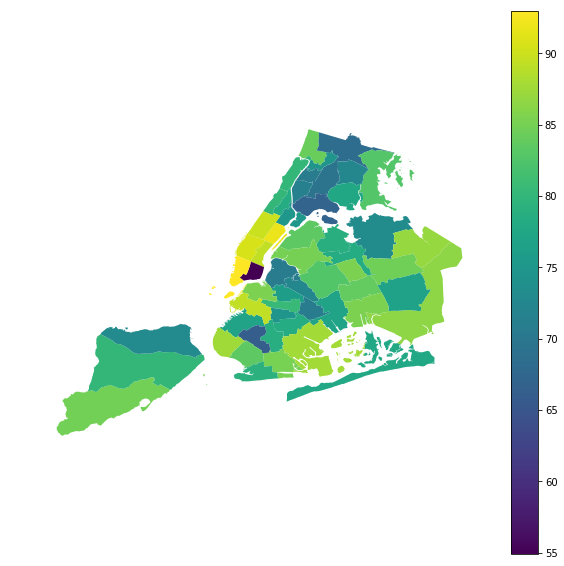

In [184]:
pumashp.plot(column='Percent', figsize=(10,10), legend=True).axis('off')

# 4. LinkNYC: assess whether the locations of the linkNYC stations are supplying internet where it is needed.

In [190]:
def getlinkNYC():
    '''
    gets link NYC data locations in csv form
    '''
    print ("Downloading")
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/linkNYClocations.csv"):
        if os.path.isfile('linkNYClocations.csv'):
            # if in the current dir just move it
            os.system("mv linkNYClocations.csv " + os.getenv("PUIDATA"))
        #otherwise download file
        else:
            os.system("curl -O https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW7_fb55/linkNYClocations.csv > linkNYClocations.csv")
            ###  To move it I use the os.system() functions to run bash commands with arguments
            os.system("mv  linkNYClocations.csv" + os.getenv("PUIDATA"))
    
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/linkNYClocations.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [193]:
linkNYCdf = pd.read_csv(os.getenv("PUIDATA") + "/linkNYClocations.csv")

In [194]:
linkNYCdf.head()

,Unnamed: 0,link_site,longitude,date_link_,latitude
0,0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [200]:
linkNYCdf = linkNYCdf.iloc[0:,1:]

In [201]:
linkNYCdf.head()

,link_site,longitude,date_link_,latitude
0,bk-01-138951,-73.942489,2017-07-01,40.701668
1,bk-01-109091,-73.942169,2017-07-01,40.701542
2,bk-01-143982,-73.942239,2017-07-01,40.701930
3,bk-01-109262,-73.942918,2017-04-28,40.705060
4,bk-01-125268,-73.953439,2017-03-31,40.728133


In [202]:
linkNYCdf.shape

(1414, 4)

In [208]:
type(linkNYCdf)

pandas.core.frame.DataFrame

In [212]:
# combine lat and lon to one column
linkNYCdf['lonlat']=list(zip(linkNYCdf['longitude'],linkNYCdf['latitude']))
# Create Point Geometry for based on lonlat column
linkNYCdf['geometry']=linkNYCdf[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
linkNYCdf.head()

,link_site,longitude,date_link_,latitude,lonlat,geometry
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753)
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938)
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439)
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042)
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133)


In [273]:
linkNYCdf['date_link_'] = pd.to_datetime(linkNYCdf['date_link_'])

In [297]:
##linkNYCdf['timepassed'] = datetime.today(),linkNYCdf['date_link_'])

TypeError: unsupported type for timedelta seconds component: Series

In [288]:
linkNYCgdf = gpd.GeoDataFrame(linkNYCdf)

In [289]:
pumashp.crs = from_epsg(4326)
linkNYCgdf.crs = from_epsg(4326)
linkNYCgdf = linkNYCgdf.to_crs(pumashp.crs)

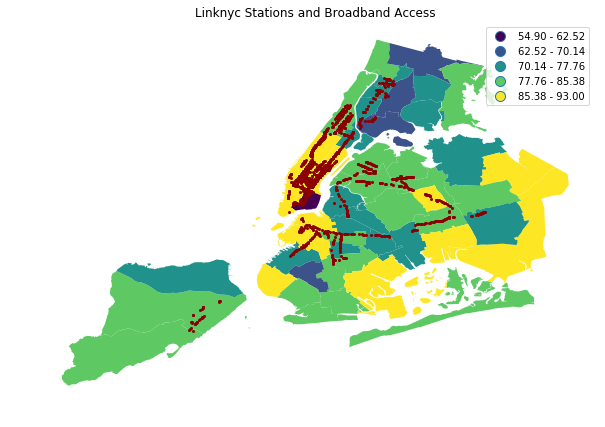

In [302]:
fig, ax = pl.subplots(figsize=(10,7))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
#ax.set_aspect('equal')
#
pumashp.plot(ax=ax, column='Percent', figsize=(30), legend=True,  k = 5, scheme = 'Equal_interval').axis('off')
linkNYCgdf.plot(ax=ax, k = 5, figsize=(30), marker='o', markersize=4, color='darkred')
pl.title('Linknyc Stations and Broadband Access')

pl.show()

# 5 Find the number of linkNYC locations per person by PUMA

## 5.1 with the AFF API from ACS get the total population by puma and merge it into your GeoDF

In [331]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + 
resp = requests.request('GET', url).content
pumaPop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [332]:
pumaPop

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN
5,42081,"Otsego, Schoharie, Oneida (South) & Herkimer (...",36,403,NaN
6,50860,"Jefferson & Lewis Counties PUMA, New York",36,500,NaN
7,44633,"Oswego County PUMA, New York",36,600,NaN
8,56295,"Onondaga County (Central)--Syracuse City PUMA,...",36,701,NaN
9,47988,"Onondaga County (North) PUMA, New York",36,702,NaN


In [327]:
pumashp.head()

,puma,shape_area,shape_leng,geometry,Target Geo Id2,Percent,Margin of Error,gid
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,3603701,84.3,2.6,3701
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",3603702,68.3,3.7,3702
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,3603703,82.8,3.2,3703
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",3603704,72.6,3.6,3704
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,3604015,78.8,2.9,4015


In [336]:
linkNYCgdf

,link_site,longitude,date_link_,latitude,lonlat,geometry,timepassed
0,bk-01-138951,-73.942489,2017-07-01,40.701668,"(-73.94248859, 40.70166753)",POINT (-73.94248859 40.70166753),480 days 23:18:46.585948
1,bk-01-109091,-73.942169,2017-07-01,40.701542,"(-73.9421692831, 40.7015421938)",POINT (-73.9421692831 40.7015421938),480 days 23:18:46.585948
2,bk-01-143982,-73.942239,2017-07-01,40.701930,"(-73.9422392385, 40.7019303439)",POINT (-73.94223923850001 40.7019303439),480 days 23:18:46.585948
3,bk-01-109262,-73.942918,2017-04-28,40.705060,"(-73.94291758, 40.70506042)",POINT (-73.94291758 40.70506042),544 days 23:18:46.585948
4,bk-01-125268,-73.953439,2017-03-31,40.728133,"(-73.953439, 40.728133)",POINT (-73.953439 40.728133),572 days 23:18:46.585948
5,bk-01-140988,-73.957869,2017-11-03,40.717770,"(-73.95786908, 40.71777024)",POINT (-73.95786907999999 40.71777024),355 days 23:18:46.585948
6,bk-06-125931,-73.981936,2017-02-24,40.674556,"(-73.98193577, 40.67455551)",POINT (-73.98193577000001 40.67455551),607 days 23:18:46.585948
7,bk-06-125930,-73.979738,2017-02-24,40.677620,"(-73.97973799, 40.67761961)",POINT (-73.97973799 40.67761961),607 days 23:18:46.585948
8,bk-08-125716,-73.974060,2017-11-03,40.679568,"(-73.97406, 40.679568)",POINT (-73.97405999999999 40.679568),355 days 23:18:46.585948
9,bk-06-126514,-73.974371,2017-11-03,40.679639,"(-73.9743714571, 40.6796385839)",POINT (-73.97437145710001 40.6796385839),355 days 23:18:46.585948


In [333]:
linkpp = pumashp.merge(pumaPop, left_on = 'puma', right_on = 'public use microdata area')

In [334]:
linkpp.head()

,puma,shape_area,shape_leng,geometry,Target Geo Id2,Percent,Margin of Error,gid,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...,3603701,84.3,2.6,3701,42158,"NYC-Bronx Community District 8--Riverdale, Fie...",36,3701,NaN
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,...",3603702,68.3,3.7,3702,49817,"NYC-Bronx Community District 12--Wakefield, Wi...",36,3702,NaN
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...,3603703,82.8,3.2,3703,44329,"NYC-Bronx Community District 10--Co-op City, P...",36,3703,NaN
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,...",3603704,72.6,3.6,3704,44476,NYC-Bronx Community District 11--Pelham Parkwa...,36,3704,NaN
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...,3604015,78.8,2.9,4015,55953,NYC-Brooklyn Community District 14--Flatbush &...,36,4015,NaN


In [ ]:
linkpp.groupby(puma, )